In [2]:
# Konfigurasi Spark
import os
import sys

# 1. Mengeset variabel yang menyimpan lokasi di mana Spark diinstal
spark_path = "C:\\Users\\THeo\\Documents\\Kuliah\\Bigdata\\spark-2.1.0-bin-hadoop2.7"

# 2. Menentukan environment variable SPARK_HOME
os.environ['SPARK_HOME'] = spark_path

# 3. Simpan lokasi winutils.exe sebagai environment variable HADOOP_HOME
os.environ['HADOOP_HOME'] = spark_path

# 4. Lokasi Python yang dijalankan --> punya Anaconda
#    Apabila Python yang diinstall hanya Anaconda, maka tidak perlu menjalankan baris ini.
os.environ['PYSPARK_PYTHON'] = sys.executable

# 5. Konfigurasi path library PySpark
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

# 6. Import library Spark
#    Dua library yang WAJIB di-import adalah **SparkContext** dan **SparkConf**.
from pyspark import SparkContext
from pyspark import SparkConf

# Setting konfigurasi (opsional)
conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")

sc = SparkContext("local", conf=conf)

In [3]:
from numpy import array
from math import sqrt
import pandas as pd
import re
import matplotlib.pyplot as plt

from pyspark.mllib.clustering import KMeans, KMeansModel

# Load and parse the data
data = pd.read_csv('C:\\Users\\THeo\\Documents\\Kuliah\\Bigdata\\dataset\\complete.csv',error_bad_lines=False)

b'Skipping line 878: expected 11 fields, saw 12\nSkipping line 1713: expected 11 fields, saw 12\nSkipping line 1815: expected 11 fields, saw 12\nSkipping line 2858: expected 11 fields, saw 12\nSkipping line 3734: expected 11 fields, saw 12\nSkipping line 4756: expected 11 fields, saw 12\nSkipping line 5389: expected 11 fields, saw 12\nSkipping line 5423: expected 11 fields, saw 12\nSkipping line 5614: expected 11 fields, saw 12\nSkipping line 5849: expected 11 fields, saw 12\nSkipping line 6093: expected 11 fields, saw 12\nSkipping line 7516: expected 11 fields, saw 12\nSkipping line 7626: expected 11 fields, saw 12\nSkipping line 8893: expected 11 fields, saw 12\nSkipping line 9015: expected 11 fields, saw 12\nSkipping line 9571: expected 11 fields, saw 12\nSkipping line 9620: expected 11 fields, saw 12\nSkipping line 9751: expected 11 fields, saw 12\nSkipping line 10157: expected 11 fields, saw 12\nSkipping line 10427: expected 11 fields, saw 12\nSkipping line 12035: expected 11 fiel

In [4]:
from pyspark.sql import *
sqlContext = SQLContext(sc)
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data = data[(data.longitude != 0) & (data.latitude != 0)]
data = data.dropna()
data_df = data[['latitude','longitude']]
dataDF = sqlContext.createDataFrame(data_df)
dataRDD = dataDF.rdd.map(tuple)
dataRDD.collect()

[(29.883055600000006, -97.94111109999999),
 (28.9783333, -96.64583329999999),
 (21.418055600000002, -157.8036111),
 (36.595, -82.18888890000001),
 (41.1175, -73.4083333),
 (33.586111100000004, -86.28611109999999),
 (30.294722200000002, -82.9841667),
 (33.916388899999994, -118.35166670000001),
 (35.2333333, -82.7344444),
 (40.66861110000001, -73.5275),
 (37.153611100000006, -83.7619444),
 (35.8238889, -80.25361109999999),
 (36.84305560000001, -83.3219444),
 (42.5377778, -83.2330556),
 (41.3252778, -72.1936111),
 (42.3916667, -71.5666667),
 (38.1055556, -98.6597222),
 (32.8544444, -79.975),
 (45.5827778, -122.3522222),
 (29.423888899999998, -98.4933333),
 (38.2541667, -85.7594444),
 (40.7008333, -73.7133333),
 (41.7002778, -73.92138890000001),
 (32.7152778, -117.1563889),
 (38.7583333, -104.7425),
 (29.763055600000005, -95.3630556),
 (32.783333299999995, -96.8),
 (42.9955556, -71.45527779999999),
 (29.763055600000005, -95.3630556),
 (44.7630556, -85.6205556),
 (41.033888899999994, -73.76

In [10]:
# Build the model (cluster the data)
clusters = KMeans.train(dataRDD, 3, maxIterations=2, initializationMode="random")

In [11]:
# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = dataRDD.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

Within Set Sum of Squared Error = 485579.7287022787


In [12]:
predict = dataRDD.map(clusters.predict)
label = predict.collect()
x = dataRDD.map(lambda row: row[0]).collect()
y = dataRDD.map(lambda row: row[1]).collect()

In [13]:
for i in range(len(label)):
    if (label[i]==1):
        color = "r";
    elif (label[i]==2):
        color = "b";
    else:
        color = "y";
    lines = plt.plot(x[i], y[i], 'o')
    plt.setp(lines, color=color, linewidth=2.0)

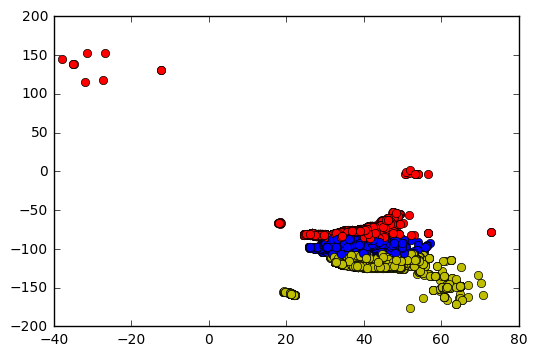

In [14]:
plt.show()